# Part I - (Flights - Data Expo 2009)
## by (your name here)

## Introduction


### Data Expo 2009 - Airline data description:
column description from: https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/HG7NV7
* **Year** 1987-2008 
* **Month** 1-12 
* **DayofMonth** 1-31 
* **DayOfWeek** 1 (Monday) - 7 (Sunday) 
* **DepTime** actual departure time (local, hhm m) 
* **CRSDepTime** scheduled departure time (local, hhmm) 
* **ArrTime** actual arrival time (local, hhmm) 
* **CRSArrTime** scheduled arrival time (local, hhmm) 
* **UniqueCarrier** unique carrier code 
* **FlightNum** flight number 
* **TailNum** plane tail number 
* **ActualElapsedTime** in minutes 
* **CRSElapsedTime** in minutes 
* **AirTime** in minutes 
* **ArrDelay** arrival delay, in minutes 
* **DepDelay** departure delay, in minutes 
* **Origin** origin IATA airport code 
* **Dest** destination IATA airport code 
* **Distance** in miles 
* **TaxiIn** taxi in time, in minutes 
* **TaxiOut** taxi out time in minutes 
* **Cancelled** was the flight cancelled?
* **CancellationCode** reason for cancellation (A = carrier, B = weather, C = NAS, D = security) 
* **Diverted** 1 = yes, 0 = no 
* **CarrierDelay** in minutes 
* **WeatherDelay** in minutes 
* **NASDelay** in minutes 
* **SecurityDelay** in minutes
* **LateAircraftDelay** in minutes

## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
pd.options.display.max_rows = 9999
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline


> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
df = pd.read_csv('DelayedFlights.csv')

In [3]:
#remove index column
df.drop('Unnamed: 0' , axis=1 , inplace=True)

In [4]:
df.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [5]:
df.head()


,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936758 entries, 0 to 1936757
Data columns (total 29 columns):
Year                 int64
Month                int64
DayofMonth           int64
DayOfWeek            int64
DepTime              float64
CRSDepTime           int64
ArrTime              float64
CRSArrTime           int64
UniqueCarrier        object
FlightNum            int64
TailNum              object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin               object
Dest                 object
Distance             int64
TaxiIn               float64
TaxiOut              float64
Cancelled            int64
CancellationCode     object
Diverted             int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtypes: float64(14), int64(10), object(5)
memory usage: 428.5+ MB


In [7]:
#Replace number of weekdays to name, to better understanding
df.DayOfWeek.replace(1, 'Monday',inplace=True)
df.DayOfWeek.replace(2, 'Tuesday',inplace=True)
df.DayOfWeek.replace(3, 'Wednesday',inplace=True)
df.DayOfWeek.replace(4, 'Thursday',inplace=True)
df.DayOfWeek.replace(5, 'Friday',inplace=True)
df.DayOfWeek.replace(6, 'Saturday',inplace=True)
df.DayOfWeek.replace(7, 'Sunday',inplace=True)

In [8]:
# convert Month, DayOfWeek into *ordered* categorical types
ordinal_var_dict = {'Month': [1,2,3,4,5,6,7,8,9,10,11,12],
                    'DayOfWeek': ['Monday','Tuesday' ,'Wednesday' ,'Thursday' ,'Friday' ,'Saturday' ,'Sunday' ]}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    df[var] = df[var].astype(ordered_var)

In [9]:
#convert cancellation code to actual reasons 
df.CancellationCode.replace('A', 'Carrier',inplace=True)
df.CancellationCode.replace('B', 'Weather',inplace=True)
df.CancellationCode.replace('C', 'NAS',inplace=True)
df.CancellationCode.replace('D', 'Security',inplace=True)
df.CancellationCode.replace('N', np.nan,inplace=True)


In [10]:
df.DayOfWeek.value_counts()

Friday       323259
Monday       290933
Thursday     289451
Sunday       286111
Wednesday    262805
Tuesday      260943
Saturday     223256
Name: DayOfWeek, dtype: int64

In [11]:
df.CancellationCode.value_counts()

Weather    307
Carrier    246
NAS         80
Name: CancellationCode, dtype: int64

In [12]:
df.shape

(1936758, 29)

In [13]:
df.Origin.value_counts()

ATL    131613
ORD    125979
DFW     95414
DEN     74323
LAX     58772
IAH     56847
PHX     55720
LAS     53710
EWR     52925
DTW     43923
SFO     43801
MCO     36139
CLT     35055
JFK     34706
MSP     32436
LGA     31185
SEA     31060
BWI     30710
PHL     30316
MDW     29222
SLC     28675
BOS     28196
SAN     24828
CVG     23881
MIA     23273
IAD     22125
TPA     20199
HOU     19639
FLL     19363
DAL     18710
MEM     18121
DCA     17725
STL     17328
OAK     17031
BNA     16496
CLE     16398
MCI     16022
RDU     15383
PDX     13791
SMF     13644
SJC     13082
MKE     11876
AUS     11843
SNA     11554
SAT     10902
PIT     10799
ABQ     10674
MSY     10498
IND      9710
HNL      8666
ONT      8646
CMH      8394
JAX      7933
PBI      7684
BUR      7259
BUF      6777
RSW      6602
BDL      6496
OMA      6423
RNO      6146
OKC      6114
BHM      6068
SJU      5918
SDF      5786
PVD      5694
TUL      5600
TUS      5531
ANC      5140
ELP      4828
RIC      4784
MHT      4686
LIT   

In [14]:
df.Dest.value_counts()

ORD    108984
ATL    106898
DFW     70657
DEN     63003
LAX     59969
EWR     55861
LAS     48858
PHX     47836
SFO     46876
IAH     43905
LGA     38137
MCO     36405
JFK     35506
DTW     34777
BOS     31961
SEA     31548
PHL     30795
BWI     29610
SLC     29217
MSP     28137
CLT     26898
SAN     26621
MDW     25318
IAD     22748
TPA     22665
FLL     20323
CVG     20056
DCA     19735
MIA     19706
STL     18582
OAK     18302
MCI     18205
CLE     17991
HOU     17712
RDU     17378
BNA     17338
PDX     16300
SMF     16007
MEM     15626
SJC     15577
AUS     15538
DAL     15179
SAT     14533
PIT     12487
ABQ     12183
SNA     12101
IND     11769
MSY     11706
MKE     10930
CMH     10780
ONT     10231
HNL     10095
JAX      9586
BDL      8905
OMA      8472
PBI      8463
OKC      8241
BUR      8185
BUF      7973
TUL      7777
TUS      7499
SJU      7464
BHM      7425
RSW      7316
RNO      7282
PVD      7212
SDF      6966
ELP      6587
ANC      6291
MHT      6010
RIC      5892
LIT   

In [15]:
df.UniqueCarrier.value_counts()


WN    377602
AA    191865
MQ    141920
UA    141426
OO    132433
DL    114238
XE    103663
CO    100195
US     98425
EV     81877
NW     79108
FL     71284
YV     67063
B6     55315
OH     52657
9E     51885
AS     39293
F9     28269
HA      7490
AQ       750
Name: UniqueCarrier, dtype: int64

## The full name of Airport codes

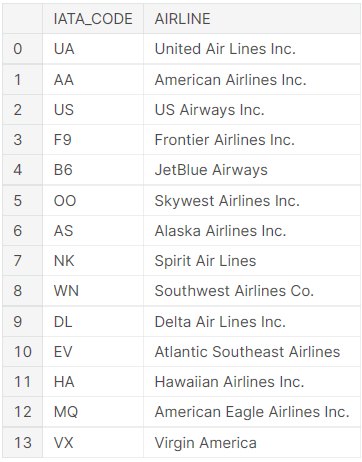

In [16]:
df['delayed'] = df.loc[:, ['ArrDelay']] > 0
df.head()


,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,delayed
0,2008,1,3,Thursday,2003.0,1955,2211.0,2225,WN,335,...,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,False
1,2008,1,3,Thursday,754.0,735,1002.0,1000,WN,3231,...,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,True
2,2008,1,3,Thursday,628.0,620,804.0,750,WN,448,...,17.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,True
3,2008,1,3,Thursday,1829.0,1755,1959.0,1925,WN,3920,...,10.0,0,NaN,0,2.0,0.0,0.0,0.0,32.0,True
4,2008,1,3,Thursday,1940.0,1915,2121.0,2110,WN,378,...,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,True


In [17]:
df['delayed'] = df['delayed'].astype(int)
df['delayed'].value_counts()

1    1723415
0     213343
Name: delayed, dtype: int64

In [18]:
df.isna().sum()

Year                       0
Month                      0
DayofMonth                 0
DayOfWeek                  0
DepTime                    0
CRSDepTime                 0
ArrTime                 7110
CRSArrTime                 0
UniqueCarrier              0
FlightNum                  0
TailNum                    5
ActualElapsedTime       8387
CRSElapsedTime           198
AirTime                 8387
ArrDelay                8387
DepDelay                   0
Origin                     0
Dest                       0
Distance                   0
TaxiIn                  7110
TaxiOut                  455
Cancelled                  0
CancellationCode     1936125
Diverted                   0
CarrierDelay          689270
WeatherDelay          689270
NASDelay              689270
SecurityDelay         689270
LateAircraftDelay     689270
delayed                    0
dtype: int64

### What is the structure of your dataset?

> 1936758 row and 29 columns
>There are 1936758  diamonds in the dataset with 29 features. 

### What is/are the main feature(s) of interest in your dataset?
> I'm most interested in figuring out what features are affect the canellation and Delay of the flights in the dataset.


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> * Date information such as columns (Year , Month , DayofMonth and DayOfWeek )
> * Departure and Arrival time (DepTime , CRSDepTime , ArrTime ,CRSArrTime, ArrDelay and DepDelay)
> * Cancellation Reasons ( WeatherDelay, NASDelay, CarrierDelay and SecurityDelay) 

In [19]:
#function to create Histogram plot
def histPlot(col , xlabel, title , log = False, xlim= (250 , 700)):
    """
    col: column name which we plot histogram for
    xlabel: title of xlabel
    title: title for histogram plot
    log: False if we don't want to x-logged , True if we want to X-log
    """
    plt.figure(figsize=[8, 5])
    if log :
        binsize = 0.025
        bins = 10 ** np.arange(2.4, np.log10(df[col].max())+binsize, binsize)
        plt.xscale('log')
    else:
        binsize = 1
        bins = np.arange(0, df[col].max()+binsize, binsize)
    
    plt.hist(data = df, x = col, bins = bins)
    plt.xlabel(xlabel)
    plt.xlim(xlim)
    #plt.xticks([300, 400, 600],[300, 400, 600])
    plt.title(title)

## Univariate Exploration

I'll start by looking at the distribution of the main variables


### How much canceled flights?

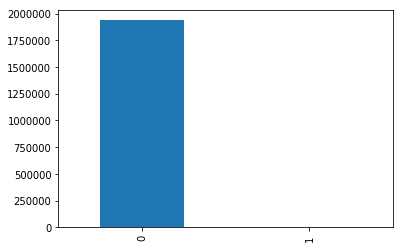

In [20]:
df.Cancelled.value_counts().plot(kind='bar')

**The plot show us a huge number of 'not cancelled' flights , so the number of cancelled not seen**

In [21]:
df.Cancelled.value_counts()

0    1936125
1        633
Name: Cancelled, dtype: int64

**There are 633 flights cancelled from 1987 to 2009**

Text(0.5,1,'The percentage of Cancelled Flights')

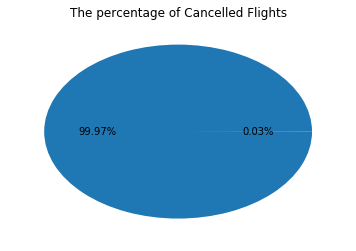

In [22]:
plt.pie(df.Cancelled.value_counts(), autopct='%.2f%%');
plt.title('The percentage of Cancelled Flights')

**the cancelled rate is so small**

### Let's check on Arrival Delay percentage

Text(0.5,1,'The percentage of Arrival Delay Flights')

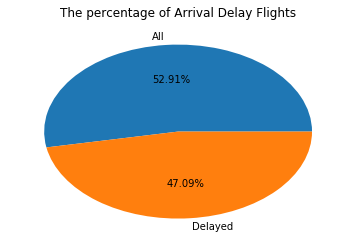

In [23]:
percent = df[df.ArrDelay >0]['ArrDelay'].count()

label=['All', 'Delayed']
val = [(df.shape[0]) ,percent]

plt.pie(val ,labels =label, autopct='%.2f%%');
plt.title('The percentage of Arrival Delay Flights')

**About half of flights are Delayed, it seems a real problem!**

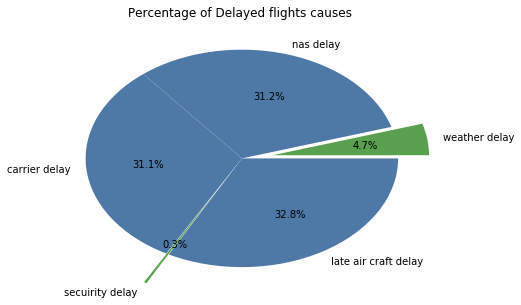

In [24]:
# store the percent of delay caused be each reason of these 5 reasons below
wethear= df[df.WeatherDelay >0]['WeatherDelay'].count() / df.delayed.count()
nas=  df[df.NASDelay >0]['NASDelay'].count() / df.delayed.count()
carrier=  df[df.CarrierDelay >0]['CarrierDelay'].count() /df.delayed.count()
secuirity = df[df.SecurityDelay >0]['SecurityDelay'].count() /df.delayed.count()
late_aircraft = df[df.LateAircraftDelay >0]['LateAircraftDelay'].count()/ df.delayed.count()

X = ['weather delay','nas delay', 'carrier delay', 'secuirity delay','late air craft delay']
Y = [wethear ,nas ,carrier , secuirity ,late_aircraft ]
plt.figure(figsize=[7, 5])
plt.pie(Y, labels=X ,colors=['#59a14f','#4e79a7','#4e79a7','#59a14f','#4e79a7'] , explode=[0.2,0,0,0.3,0], autopct='%1.1f%%')
plt.title('Percentage of Delayed flights causes ')
plt.show()

**The Pie chart show us that: security delay and wheather delay are not usually causes the flights delay, in another hand  the most coases are by late air craft and nas delay**

### What is the distribution of Departure delay?

([<matplotlib.axis.XTick at 0x7f88bfbe7cc0>,
 <a list of 4 Text xticklabel objects>)

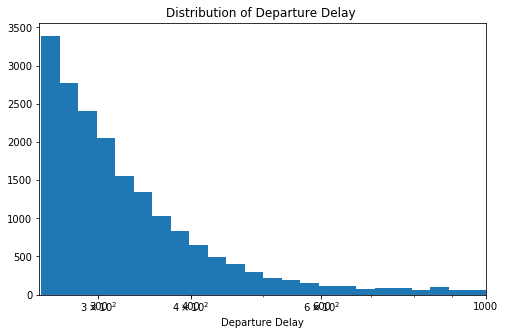

In [25]:
histPlot('DepDelay'  , 'Departure Delay', 'Distribution of Departure Delay ', log = True, xlim=  (250, 1000) )
plt.xticks([300, 400, 600, 1000],[300, 400, 600, 1000] )

**The distribution of Departure Delay also right skewed with long tail**

In [26]:
#isolate canceled data for on going analysis 
cancelled = df[df['Cancelled']==1]
cancelled.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,delayed
1542406,2008,10,27,Monday,1622.0,1420,NaN,1520,WN,27,...,19.0,1,Carrier,0,NaN,NaN,NaN,NaN,NaN,0
1546593,2008,10,25,Saturday,1323.0,1255,NaN,1442,XE,2347,...,NaN,1,Weather,0,NaN,NaN,NaN,NaN,NaN,0
1547161,2008,10,22,Wednesday,1825.0,1815,NaN,1927,XE,2819,...,NaN,1,NAS,0,NaN,NaN,NaN,NaN,NaN,0
1547178,2008,10,22,Wednesday,1733.0,1715,NaN,1818,XE,2890,...,NaN,1,Weather,0,NaN,NaN,NaN,NaN,NaN,0
1548271,2008,10,15,Wednesday,1943.0,1745,NaN,1857,XE,2117,...,NaN,1,Weather,0,NaN,NaN,NaN,NaN,NaN,0


num of dalay of day of month / num of all this day 

In [27]:
all = df.DayOfWeek.value_counts()
canceled_day = cancelled.DayOfWeek.value_counts()
percent = np.divide(canceled_day, all)
df['cancellRate'] = percent
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,delayed,cancellRate
0,2008,1,3,Thursday,2003.0,1955,2211.0,2225,WN,335,...,0,NaN,0,NaN,NaN,NaN,NaN,NaN,0,NaN
1,2008,1,3,Thursday,754.0,735,1002.0,1000,WN,3231,...,0,NaN,0,NaN,NaN,NaN,NaN,NaN,1,NaN
2,2008,1,3,Thursday,628.0,620,804.0,750,WN,448,...,0,NaN,0,NaN,NaN,NaN,NaN,NaN,1,NaN
3,2008,1,3,Thursday,1829.0,1755,1959.0,1925,WN,3920,...,0,NaN,0,2.0,0.0,0.0,0.0,32.0,1,NaN
4,2008,1,3,Thursday,1940.0,1915,2121.0,2110,WN,378,...,0,NaN,0,NaN,NaN,NaN,NaN,NaN,1,NaN


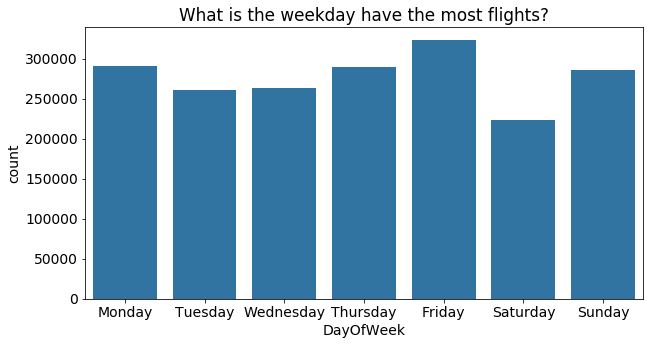

In [28]:

font = {'size'   : 14}
plt.rc('font', **font)
plt.figure(figsize=[10, 5])
base_color = sb.color_palette()[0]
plt.title('What is the weekday have the most flights?')
# Use the `color` argument

sb.countplot(data=df, x='DayOfWeek', color=base_color);


**from the visualization above, we can notice that the Friday have largest number of flights**

Text(0.5,0,'Airport code')

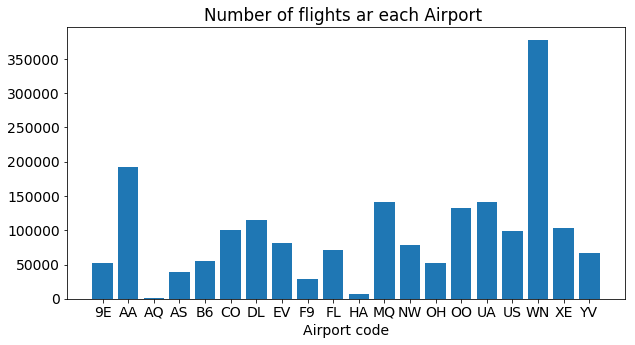

In [29]:
airlines = df.UniqueCarrier.value_counts()
plt.figure(figsize=[10, 5])
plt.bar(airlines.index, airlines) 

plt.title('Number of flights ar each Airport ')
plt.xlabel('Airport code')


**Southwest Airline Co (WN) have a huge number of flights**

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936758 entries, 0 to 1936757
Data columns (total 31 columns):
Year                 int64
Month                category
DayofMonth           int64
DayOfWeek            category
DepTime              float64
CRSDepTime           int64
ArrTime              float64
CRSArrTime           int64
UniqueCarrier        object
FlightNum            int64
TailNum              object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin               object
Dest                 object
Distance             int64
TaxiIn               float64
TaxiOut              float64
Cancelled            int64
CancellationCode     object
Diverted             int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
delayed              int64
cancellRate          float64
dtypes: c

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Southwest Airline Co (WN) have the large number of Flights(double) other Airlines 

> The distribution of Departure and Actual Elabsed time are not normally, they are right distributed

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> I replace undesirbted names of cancelation code and weekdays to more understanding names
> I made the Weekday and months categorical and ordinal to upcoming visualization

## Bivariate Exploration


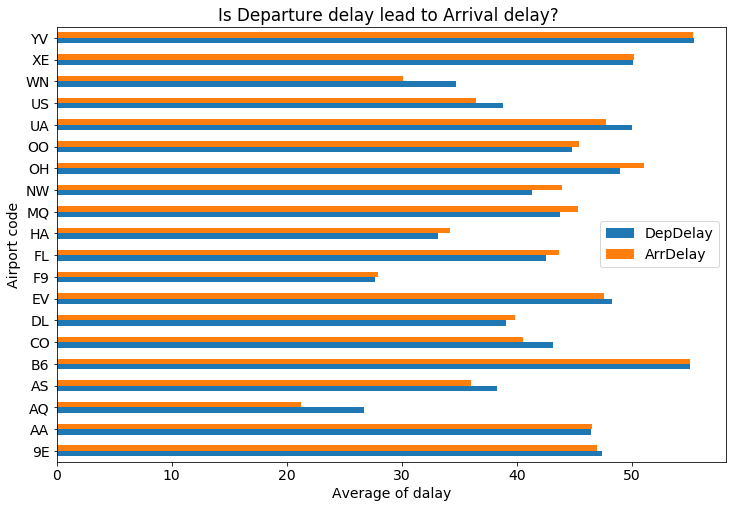

In [31]:
delayAir = df.loc[:, ['UniqueCarrier', 'DepDelay','ArrDelay']].groupby('UniqueCarrier').mean()
delayAir.plot.barh(figsize=(12,8), stacked=False)
plt.title('Is Departure delay lead to Arrival delay? ')
plt.xlabel('Average of dalay')
plt.ylabel('Airport code')
plt.show()

**the number of departure delay and arrival delay is so close, especially in AA, B6, XE and YV Airport**

In [32]:
#check the correlation between departure delay and arrival delay
df[['DepDelay','ArrDelay']].corr()

,DepDelay,ArrDelay
DepDelay,1.000000,0.952927
ArrDelay,0.952927,1.000000


**the correlation between departure delay and arrival delay is 95% !! whic is large enough to make us think the departure delay may affect on arrival delay**

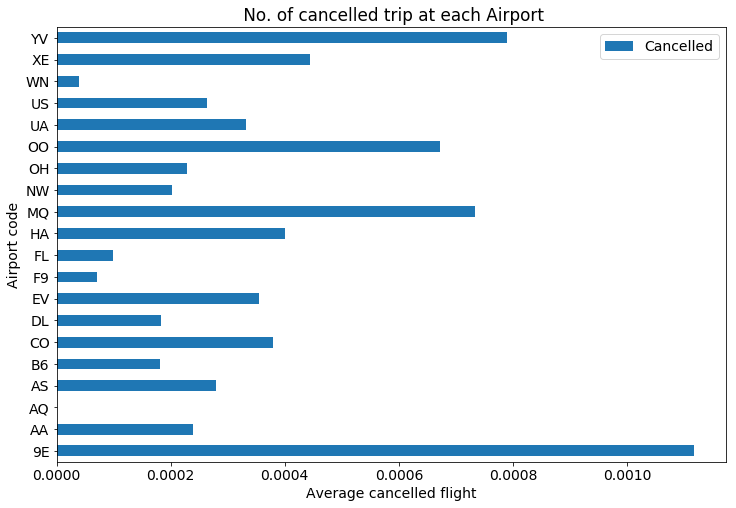

In [33]:
canelledAir = df.loc[:, ['UniqueCarrier', 'Cancelled']].groupby('UniqueCarrier').mean()
canelledAir.plot.barh(figsize=(12,8), stacked=False)
plt.title(' No. of cancelled trip at each Airport')
plt.xlabel('Average cancelled flight')
plt.ylabel('Airport code')
plt.show()

**Airport 9E seems to have huge number of cancelled trip!! , and AQ doesn't have any cancelled, we will be sure in next section by compute the percent of cancelled trips**

### Let's lock at percentage of cancelled flights 

In [34]:
df.shape , cancelled.shape
cancelled.head()


,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,delayed
1542406,2008,10,27,Monday,1622.0,1420,NaN,1520,WN,27,...,19.0,1,Carrier,0,NaN,NaN,NaN,NaN,NaN,0
1546593,2008,10,25,Saturday,1323.0,1255,NaN,1442,XE,2347,...,NaN,1,Weather,0,NaN,NaN,NaN,NaN,NaN,0
1547161,2008,10,22,Wednesday,1825.0,1815,NaN,1927,XE,2819,...,NaN,1,NAS,0,NaN,NaN,NaN,NaN,NaN,0
1547178,2008,10,22,Wednesday,1733.0,1715,NaN,1818,XE,2890,...,NaN,1,Weather,0,NaN,NaN,NaN,NaN,NaN,0
1548271,2008,10,15,Wednesday,1943.0,1745,NaN,1857,XE,2117,...,NaN,1,Weather,0,NaN,NaN,NaN,NaN,NaN,0


In [35]:

cancelled = cancelled.reset_index()
cancelled.drop('index', axis=1, inplace=True)

In [36]:
#allTrips = df.loc[:, ['UniqueCarrier', 'FlightNum']].groupby('UniqueCarrier').count()
#cancTr = cancelled.loc[:, ['UniqueCarrier', 'Cancelled']].groupby('UniqueCarrier').count()
# use this function to select which airline we are interested
def flight_airline(airline):
    return df.loc[df['UniqueCarrier']==airline]


# split by month
flight_month = df.loc[:, ['Month']].groupby('Month').sum()
get_airline = df.UniqueCarrier.unique()

for a in get_airline:
    flight_month[a] = flight_airline(a).loc[:, ['Month', 'Cancelled']].groupby('Month').sum()


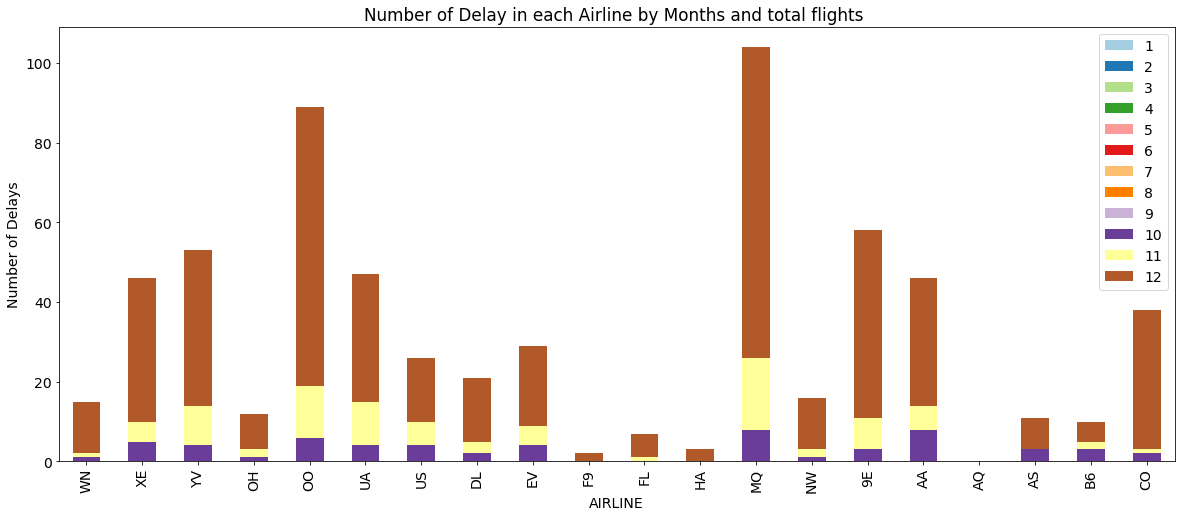

In [37]:
ax = flight_month.T.plot(kind='bar', stacked=True, figsize=(20,8), colormap= 'Paired')
ax.set(ylabel='Number of Delays', xlabel='AIRLINE')
ax.set_title('Number of Delay in each Airline by Months and total flights ')
ax.legend()
plt.show()

**From the above plot, I suggest that the cancelled flights only on the end of the year , from month 10(oct) to 12(Dec)**

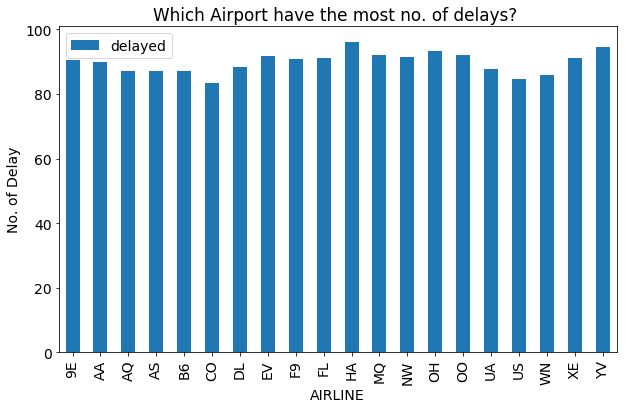

In [38]:
def draw_pct_delay(data, select, kind='bar'):
    data_select = (100*(data.loc[:, [select, 'delayed']].groupby(select).sum())
                   /(data.loc[:, [select, 'delayed']].groupby(select).count()))
    
    data_select.plot(kind=kind, figsize=(10,6))
    
    
    plt.xlabel('AIRLINE')
    plt.ylabel('No. of Delay')
    plt.title('Which Airport have the most no. of delays? ')
    plt.show()
    
draw_pct_delay(df, 'UniqueCarrier')

**HA (Hawaiian Airlines Inc.) Airport have the largest no of delay**

### What is the relationship between Cannelled, DepDelay, ArrDelay in terms of airlines?

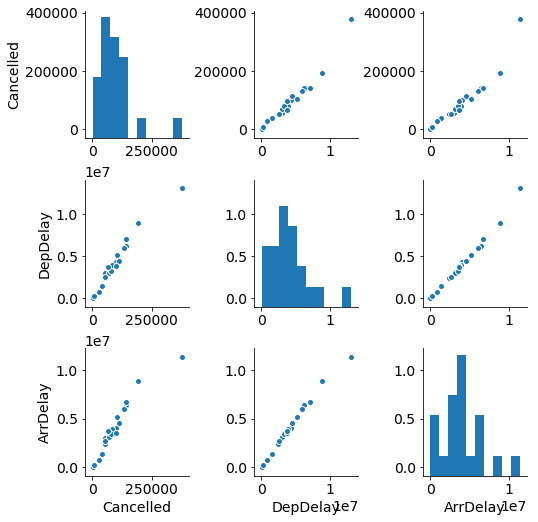

In [39]:
sample = df.groupby('UniqueCarrier')
sample = pd.merge(
    pd.DataFrame(sample.Cancelled.count()), 
    pd.DataFrame(sample.DepDelay.sum()), 
    on='UniqueCarrier').merge( pd.DataFrame(sample.ArrDelay.sum()), on='UniqueCarrier')


sb.pairplot(sample);

**All variables ( Cancelled , Departure delay and Arrival delay) have positive linear relationship**

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The relationship between cancellation , Departure dalay and Arrival delay is positive and linear!
> After visualizing the data, it looks no delay data from Jan to Sep, only Oct, Nov and Dec Months have delayed flights

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Arrival delay most of the time caused by Departure delay

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

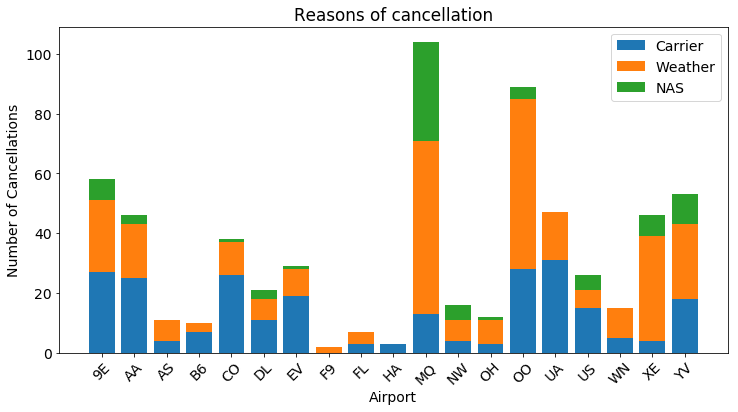

In [40]:
cancelled_group = cancelled.groupby(['UniqueCarrier','CancellationCode']).size().reindex(fill_value=0.0).unstack()
cg = cancelled_group.fillna(0)

b_bottom = cg.loc[:,'Carrier'].values
c_bottom = b_bottom + cg.loc[:,'Weather'].values
d_bottom = c_bottom + cg.loc[:,'Weather'].values

x = cg.loc[:,'Carrier'].index.values

fig, ax = plt.subplots(figsize = (12,6))

ax.set_xticks(np.arange(len(x)))
ax.set_xticklabels(x, rotation = 45)
ax.bar(np.arange(len(x)),cg.loc[:,'Carrier'].values, align='center', label='Carrier')
ax.bar(np.arange(len(x)),cg.loc[:,'Weather'].values, align='center', bottom=b_bottom, label='Weather')
ax.bar(np.arange(len(x)),cg.loc[:,'NAS'].values, align='center', bottom=c_bottom, label='NAS')


ax.set_xlabel('Airport')
ax.set_ylabel('Number of Cancellations')

plt.legend()
plt.title('Reasons of cancellation')
plt.show()



**American Eagle Airlines Inc (MQ) have a large number of cancelation by wheather and NAS**

#### Another visual for same representation

Text(0.5,1,'Reasons of cancellation ')

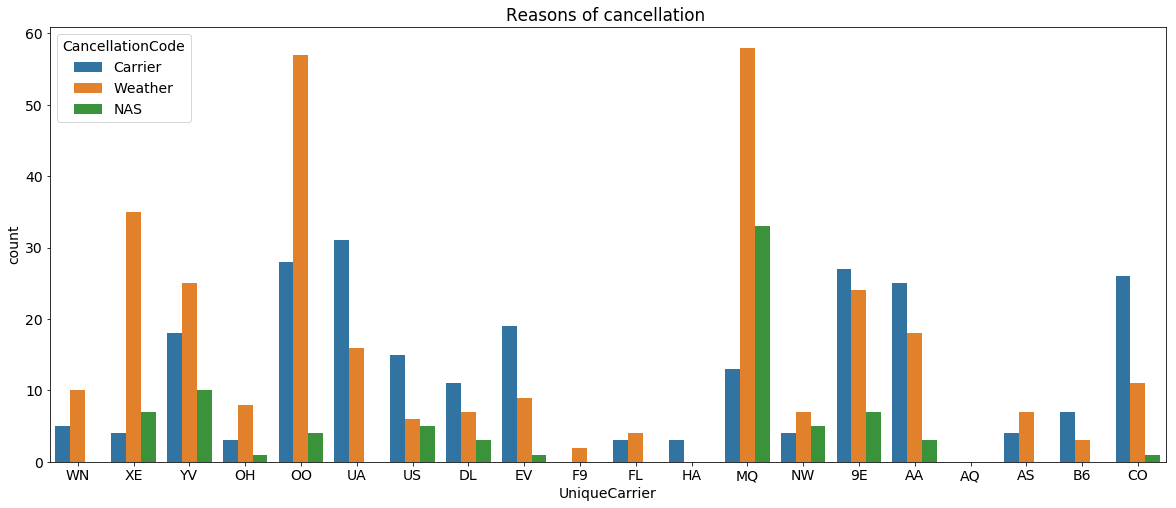

In [41]:
canceled = df.groupby('CancellationCode')
fig, ax = plt.subplots(figsize=(20, 8))
sb.countplot(data = df, x = 'UniqueCarrier', hue = 'CancellationCode' )
plt.title('Reasons of cancellation ')


In [42]:
df_weather = df[['Month', 'WeatherDelay']].groupby('Month').sum().reset_index()
df_NASDelay = df[['Month', 'NASDelay']].groupby('Month').sum().reset_index()
df_LateAircraftDelay = df[['Month', 'LateAircraftDelay']].groupby('Month').sum().reset_index()
df_CarrierDelay = df[['Month', 'CarrierDelay']].groupby('Month').sum().reset_index()


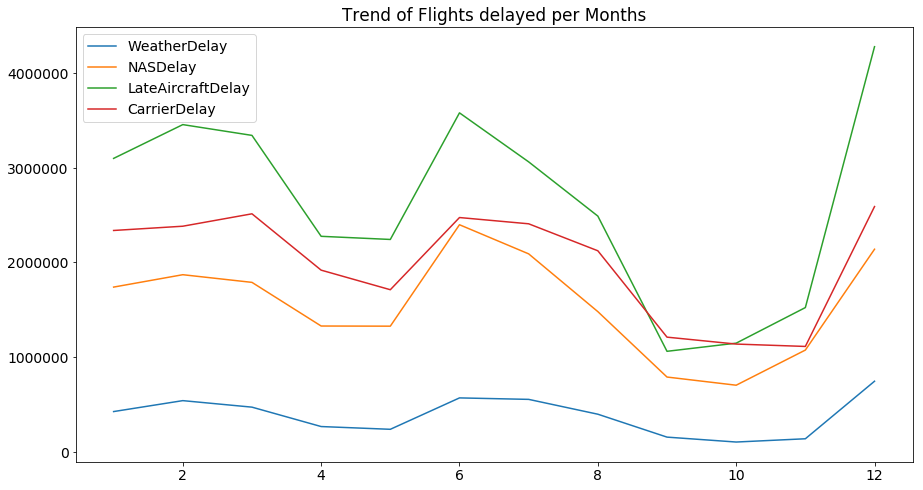

In [43]:
fig, ax = plt.subplots(figsize=(15, 8))

x = [1,2,3,4,5,6,7,8,9,10,11,12]
ax.plot( x, df_weather['WeatherDelay'] )
ax.plot(x, df_NASDelay['NASDelay'])
ax.plot(x, df_LateAircraftDelay['LateAircraftDelay'])
ax.plot(x, df_CarrierDelay['CarrierDelay'])
ax.set_title('Trend of Flights delayed per Months')
ax.legend(['WeatherDelay' , 'NASDelay','LateAircraftDelay', 'CarrierDelay'])
plt.show()

> **Weather delay increases in winter months (Dec , Jan and Feb ) also there is noticeable increase at Jun and Jul may be because holiday?**

> **Late Aircraft is the Top reason for delay and in unstables rate**

> **April, May, September and October have small number of delay**

### Average Flights Diverted by months and weekdays

[Text(0.5,1,'Average Flights Diverted by months and weekdays ')]

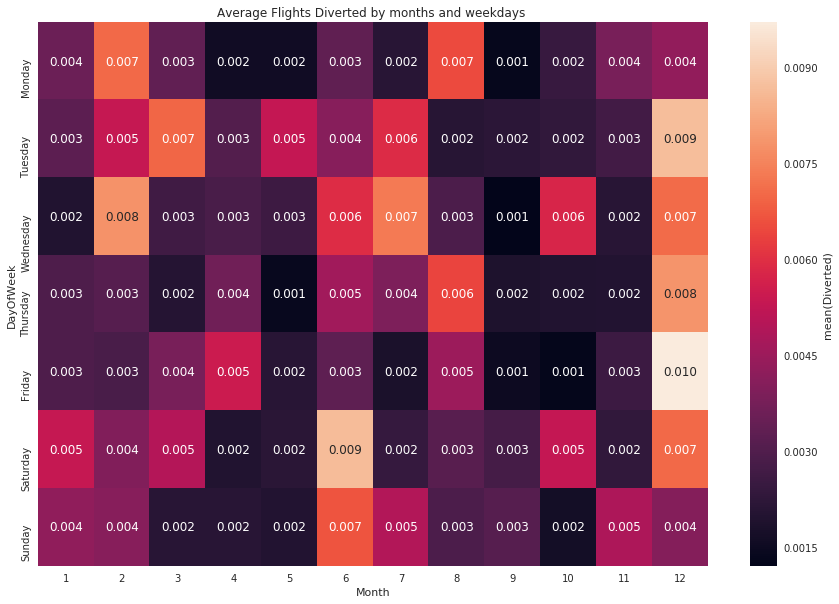

In [46]:
cat_means = df.groupby(['Month', 'DayOfWeek']).mean()['Diverted']
cat_means = cat_means.reset_index(name = 'Diverted_avg')
cat_means = cat_means.pivot(index = 'DayOfWeek', columns = 'Month',
                            values = 'Diverted_avg')
sb.set(rc = {'figure.figsize':(15,10)})
sb.heatmap(cat_means, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'mean(Diverted)'}).set(title= 'Average Flights Diverted by months and weekdays ')

**Friday in December have the largest rate of flights diverted, next  Dec-Tuesday and Jun-Saturday** 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> from my analysis, I noticed that the delayed in departure most likely to lead to delay on arrival

> the most reasons for delay are carrier and late Aircraft whereas the least is weather delay

> most of diverted occure in December especially on Friday 
### Were there any interesting or surprising interactions between features?

> it's surprising that the weather is least reason of delay or cancellation!!

## Conclusions
> The Flights data is rich and there are many interesting relationships and insights we can obtain from it, I tried to visualize all insights I thinked they will help to better understanding the data..
